# Plotting SAC Files


#### First import ObsPy (Seismic) Observatory Python

In [1]:
import obspy

### Look for a SAC file in the directory here
To load it, examine the commands below:

In [2]:
from obspy import read
st = read('./UNFILT.SAC', debug_headers=True)
st

1 Trace(s) in Stream:
IM.NV01..SHZ | 2007-07-23T22:30:09.000000Z - 2007-07-23T22:55:09.000000Z | 40.0 Hz, 60001 samples

### Examine header information
SAC files may or may not come with useful header information ...

In [ ]:
print(st[0].stats)

### Quick Plot

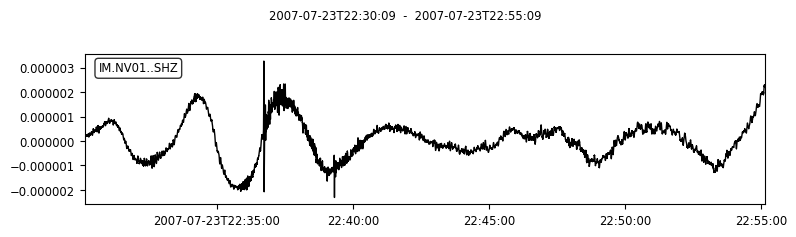

In [5]:
st.plot()

### Filter the seismogram
Highpass 0.1 Hz

In [8]:
import numpy as np
import matplotlib.pyplot as plt

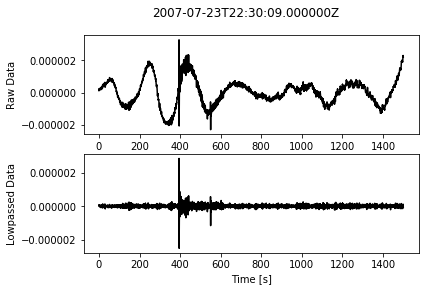

In [9]:
tr = st[0]
tr_filt = tr.copy()
tr_filt.filter('highpass', freq=0.1,corners=2,zerophase=True)

# 
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Raw Data')
plt.subplot(212)
plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Lowpassed Data')
plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()

### Bandpass Filter
e.g. [0.5,2] Hz

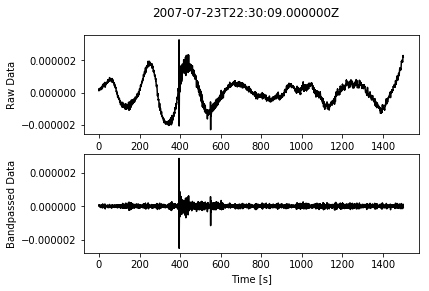

In [10]:
tr = st[0]
tr_filt_bp= tr.copy()
tr_filt_bp.filter('bandpass', freqmin=0.5,freqmax=2,corners=4,zerophase=True)
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Raw Data')
plt.subplot(212)
plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Bandpassed Data')
plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()